In [4]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms

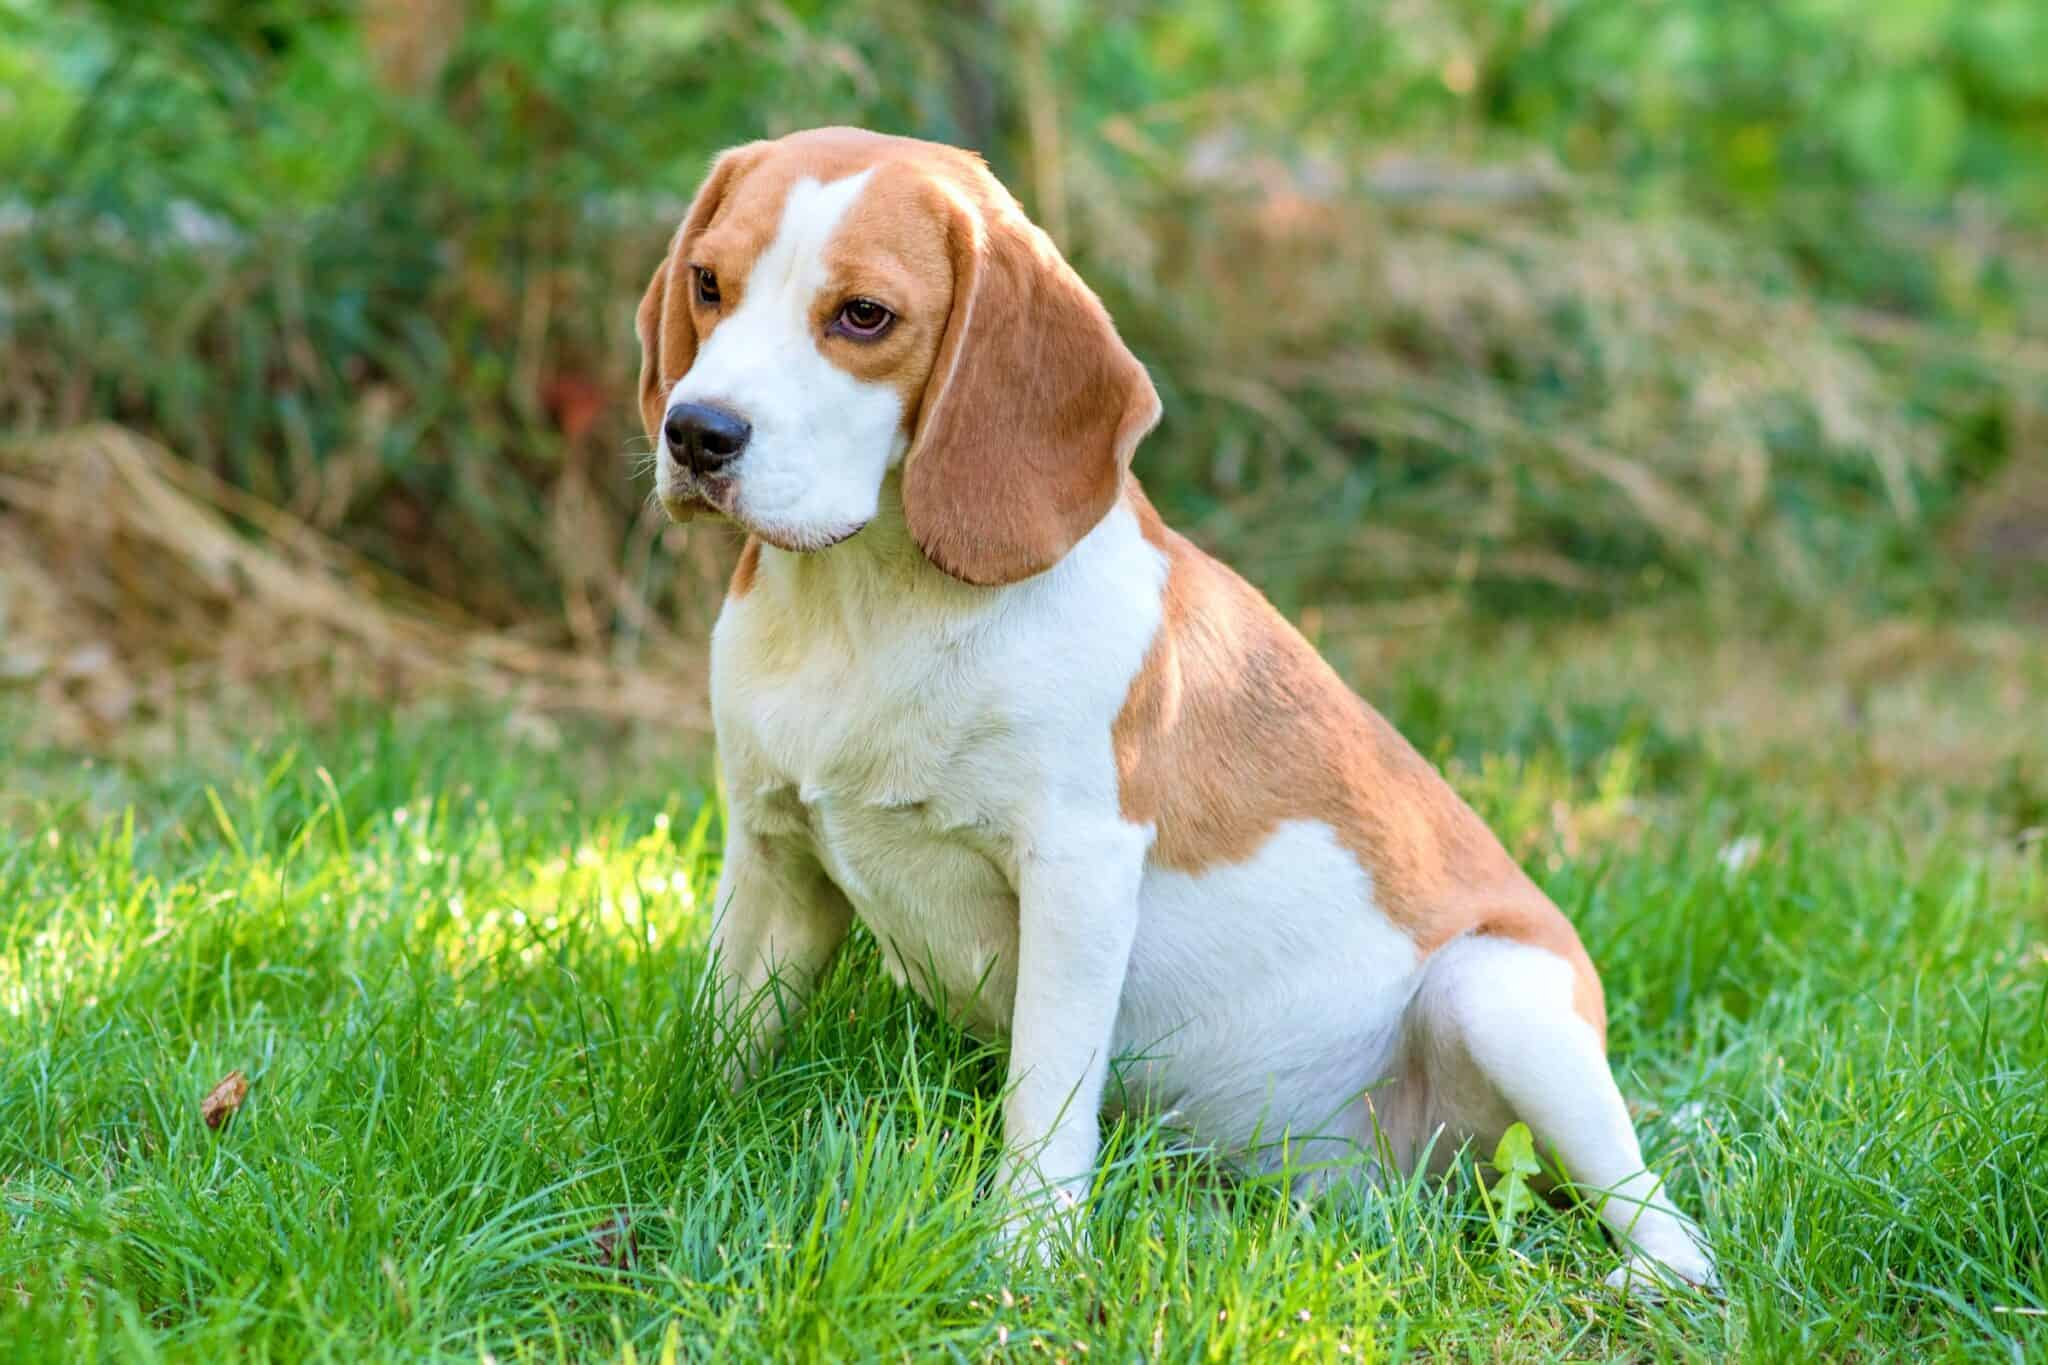

In [ ]:
image_path = "../data/dog/dog.jpg"  

image = Image.open(image_path).convert("RGB")
image

In [11]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

x = transform(image)
x = x.unsqueeze(0)  # add batch dimension

print("Image tensor shape:", x.shape)


Image tensor shape: torch.Size([1, 3, 64, 64])


In [ ]:
conv = nn.Conv2d(3, 4, kernel_size=3, padding=1)
relu = nn.ReLU()
pool = nn.MaxPool2d(2, 2)
fc = nn.Linear(4 * 32 * 32, 2)  


In [13]:
x = conv(x)
x = relu(x)
x = pool(x)
x = x.view(x.size(0), -1)  # flatten
output = fc(x)

In [14]:
pred = torch.argmax(output, dim=1).item()
if pred == 0:
    print("Predicted: Cat")
else:
    print("Predicted: Dog")

Predicted: Dog


(1, 3, 64, 64)  → input

(1, 4, 64, 64)  → conv

(1, 4, 32, 32)  → pool

(1, 4096)       → flatten

(1, 2)          → output (cat / dog)
